# Conclusion

* Among the weather contributing factors gathered, temperature exhibited the highest correlation with latitude. Temperature increases as the latitude goes closer to zero.
* For humidity, cloudiness and wind speed, latitude does not show a strong correlation proven by its pearson coefficient close to zero. These variables are linearly independent with latitude. It can then be said that these variables are not caused by the city's location but possibly other weather contributing factors.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
# Perform a weather check on each city using a series of successive API calls.
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&q="

# set up lists to hold reponse info
record = 1
set_number = 1
processed_city = []
cloud = []
country = []
date = []
humid = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Import time so as not to get blocked
import time

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        time.sleep(1)
        processed_city.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humid.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {record} of Set {set_number} | {city}")
        record += 1
        set_number += 1
    except KeyError:
        print(f"City not found | {city}")

print("Done processing...")

Processing Record 1 of Set 1 | carnarvon
City not found | temaraia
City not found | guelengdeng
Processing Record 2 of Set 2 | arraial do cabo
Processing Record 3 of Set 3 | bilibino
Processing Record 4 of Set 4 | provideniya
Processing Record 5 of Set 5 | hilo
Processing Record 6 of Set 6 | albuquerque
Processing Record 7 of Set 7 | shingu
Processing Record 8 of Set 8 | cap malheureux
Processing Record 9 of Set 9 | longyearbyen
Processing Record 10 of Set 10 | kuala terengganu
Processing Record 11 of Set 11 | palu
Processing Record 12 of Set 12 | te anau
Processing Record 13 of Set 13 | gotsu
Processing Record 14 of Set 14 | voyinka
Processing Record 15 of Set 15 | panzhihua
Processing Record 16 of Set 16 | albany
Processing Record 17 of Set 17 | sayat
Processing Record 18 of Set 18 | belmonte
Processing Record 19 of Set 19 | castro
Processing Record 20 of Set 20 | dingle
Processing Record 21 of Set 21 | ivankiv
Processing Record 22 of Set 22 | hobyo
Processing Record 23 of Set 23 | h

Processing Record 178 of Set 178 | whitehorse
Processing Record 179 of Set 179 | saint-francois
Processing Record 180 of Set 180 | bay roberts
Processing Record 181 of Set 181 | thompson
Processing Record 182 of Set 182 | barra do garcas
Processing Record 183 of Set 183 | sangar
Processing Record 184 of Set 184 | chuy
Processing Record 185 of Set 185 | valle de allende
Processing Record 186 of Set 186 | brae
Processing Record 187 of Set 187 | carballo
Processing Record 188 of Set 188 | sao joao da barra
Processing Record 189 of Set 189 | talnakh
Processing Record 190 of Set 190 | yeppoon
City not found | huazolotitlan
Processing Record 191 of Set 191 | dingolfing
Processing Record 192 of Set 192 | cortona
Processing Record 193 of Set 193 | izumo
City not found | amderma
Processing Record 194 of Set 194 | alofi
Processing Record 195 of Set 195 | port hedland
Processing Record 196 of Set 196 | deputatskiy
Processing Record 197 of Set 197 | ust-tsilma
Processing Record 198 of Set 198 | ku

Processing Record 357 of Set 357 | union
Processing Record 358 of Set 358 | mach
Processing Record 359 of Set 359 | yarada
Processing Record 360 of Set 360 | tucuman
Processing Record 361 of Set 361 | arkansas city
Processing Record 362 of Set 362 | ostrovnoy
Processing Record 363 of Set 363 | faanui
Processing Record 364 of Set 364 | rio grande
City not found | tumannyy
Processing Record 365 of Set 365 | matara
Processing Record 366 of Set 366 | port hardy
Processing Record 367 of Set 367 | dengzhou
Processing Record 368 of Set 368 | mundi
Processing Record 369 of Set 369 | pisco
Processing Record 370 of Set 370 | ulladulla
Processing Record 371 of Set 371 | vredendal
Processing Record 372 of Set 372 | mumbwa
Processing Record 373 of Set 373 | marawi
Processing Record 374 of Set 374 | tabou
Processing Record 375 of Set 375 | khartoum
Processing Record 376 of Set 376 | pesochnoye
Processing Record 377 of Set 377 | praia da vitoria
Processing Record 378 of Set 378 | araguaina
Processing

Processing Record 536 of Set 536 | tarpon springs
Processing Record 537 of Set 537 | bairiki
Processing Record 538 of Set 538 | paramirim
Processing Record 539 of Set 539 | sherbakul
Processing Record 540 of Set 540 | saint-augustin
Processing Record 541 of Set 541 | toyohashi
Processing Record 542 of Set 542 | fort-de-france
Processing Record 543 of Set 543 | salihorsk
Processing Record 544 of Set 544 | maracacume
Processing Record 545 of Set 545 | port macquarie
Processing Record 546 of Set 546 | sept-iles
Processing Record 547 of Set 547 | dicabisagan
Processing Record 548 of Set 548 | ariquemes
Processing Record 549 of Set 549 | namatanai
Processing Record 550 of Set 550 | kisangani
Processing Record 551 of Set 551 | pontes e lacerda
Processing Record 552 of Set 552 | parfino
Processing Record 553 of Set 553 | campo verde
Processing Record 554 of Set 554 | great yarmouth
Processing Record 555 of Set 555 | bongandanga
Processing Record 556 of Set 556 | bitung
Processing Record 557 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Display the DataFrame

df = pd.DataFrame({"City": processed_city,
                   "Cloudiness": cloud,
                   "Country": country,
                   "Date": date,
                   "Humidity":humid,
                   "Lat": lat,
                   "Lng": lng,
                   "Max Temp": max_temp,
                   "Wind Speed": wind_speed
                  })
df

NameError: name 'processed_city' is not defined

In [5]:
df.count()

NameError: name 'df' is not defined

In [43]:
df.to_csv("../output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
# Output File (CSV)
output_data_file = "../output_data/cities.csv"

output_df = pd.read_csv(output_data_file)
output_df= output_df.drop(["Unnamed: 0"], axis=1)
output_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Carnarvon,0,AU,1586138776,78,-24.87,113.63,298.15,5.70
1,Arraial do Cabo,77,BR,1586138779,69,-22.97,-42.03,297.28,3.58
2,Bilibino,42,RU,1586138780,82,68.05,166.44,256.73,1.06
3,Provideniya,100,RU,1586138781,66,64.38,-173.30,262.15,7.00
4,Hilo,90,US,1586138642,65,19.73,-155.09,299.15,5.70
...,...,...,...,...,...,...,...,...,...
566,Kiryat Gat,40,IL,1586139436,87,31.61,34.76,289.15,2.10
567,Arrondissement de Saint-Denis,0,FR,1586139437,53,48.92,2.33,286.15,3.70
568,Ballina,10,AU,1586139233,60,-28.87,153.57,298.71,4.10
569,Cimarron Hills,20,US,1586139439,20,38.86,-104.70,290.15,5.10


In [9]:
# Convert Date 
timestamp = 1586138776
date = datetime.fromtimestamp(timestamp)
output_df["Date"]=date
output_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Carnarvon,0,AU,2020-04-05 22:06:16,78,-24.87,113.63,298.15,5.70
1,Arraial do Cabo,77,BR,2020-04-05 22:06:16,69,-22.97,-42.03,297.28,3.58
2,Bilibino,42,RU,2020-04-05 22:06:16,82,68.05,166.44,256.73,1.06
3,Provideniya,100,RU,2020-04-05 22:06:16,66,64.38,-173.30,262.15,7.00
4,Hilo,90,US,2020-04-05 22:06:16,65,19.73,-155.09,299.15,5.70
...,...,...,...,...,...,...,...,...,...
566,Kiryat Gat,40,IL,2020-04-05 22:06:16,87,31.61,34.76,289.15,2.10
567,Arrondissement de Saint-Denis,0,FR,2020-04-05 22:06:16,53,48.92,2.33,286.15,3.70
568,Ballina,10,AU,2020-04-05 22:06:16,60,-28.87,153.57,298.71,4.10
569,Cimarron Hills,20,US,2020-04-05 22:06:16,20,38.86,-104.70,290.15,5.10


#### Latitude vs. Temperature Plot

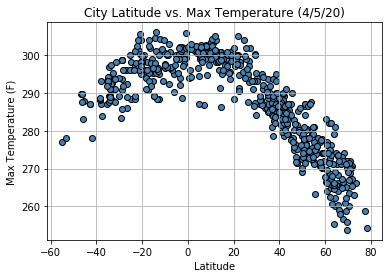

In [10]:
x_values = output_df["Lat"]
y_values = output_df["Max Temp"]
# insert date

plt.scatter(x_values, y_values, c="steelblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (4/5/20)")
plt.grid()
plt.savefig("../output_data/max_temp.png")
plt.show()


#### Latitude vs. Humidity Plot

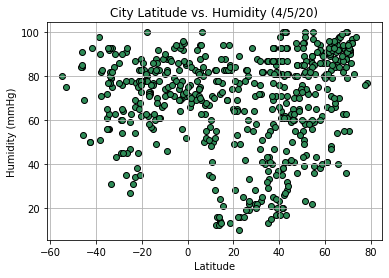

In [11]:
x_values = output_df["Lat"]
y_values = output_df["Humidity"]

plt.scatter(x_values, y_values, c="seagreen", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (mmHg)")
plt.title("City Latitude vs. Humidity (4/5/20)")
plt.grid()
plt.savefig("../output_data/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

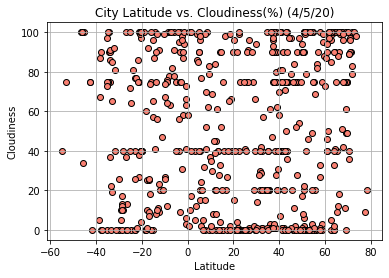

In [12]:
x_values = output_df["Lat"]
y_values = output_df["Cloudiness"]

plt.scatter(x_values, y_values, c="salmon", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness(%) (4/5/20)")
plt.grid()
plt.savefig("../output_data/cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

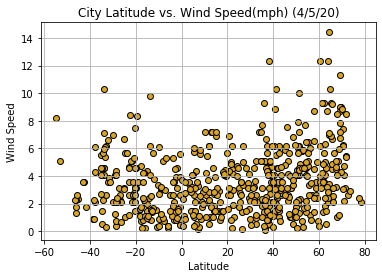

In [13]:
x_values = output_df["Lat"]
y_values = output_df["Wind Speed"]

plt.scatter(x_values, y_values, c="goldenrod", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed(mph) (4/5/20)")
plt.grid()
plt.savefig("../output_data/wind_speed.png")
plt.show()

## Linear Regression

* Your second requirement is to run linear regression on each relationship, only this time separating them into
* Northern Hemisphere (greater than or equal to 0 degrees latitude)
* Southern Hemisphere (less than 0 degrees latitude)

In [26]:
# OPTIONAL: Create a function to create Linear Regression plots

def scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath):
    plt.scatter(x_values, y_values, c=c, edgecolors="black")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(f"{title} (4/5/20)")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_loc,fontsize=13,color="red")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.grid()
    plt.savefig(png_filepath)
    plt.show()


In [27]:
# Northern Hemisphere dataframe
north_df = output_df[output_df["Lat"] >= 0]
north_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Bilibino,42,RU,2020-04-05 22:06:16,82,68.05,166.44,256.73,1.06
3,Provideniya,100,RU,2020-04-05 22:06:16,66,64.38,-173.30,262.15,7.00
4,Hilo,90,US,2020-04-05 22:06:16,65,19.73,-155.09,299.15,5.70
5,Albuquerque,40,US,2020-04-05 22:06:16,13,35.08,-106.65,293.71,7.70
6,Shingū,20,JP,2020-04-05 22:06:16,40,33.73,135.98,286.15,7.20
...,...,...,...,...,...,...,...,...,...
565,Novoagansk,100,RU,2020-04-05 22:06:16,96,61.94,76.66,274.88,4.84
566,Kiryat Gat,40,IL,2020-04-05 22:06:16,87,31.61,34.76,289.15,2.10
567,Arrondissement de Saint-Denis,0,FR,2020-04-05 22:06:16,53,48.92,2.33,286.15,3.70
569,Cimarron Hills,20,US,2020-04-05 22:06:16,20,38.86,-104.70,290.15,5.10


In [28]:
# Southern Hemisphere Dataframe
south_df = output_df[output_df["Lat"] < 0]
south_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Carnarvon,0,AU,2020-04-05 22:06:16,78,-24.87,113.63,298.15,5.70
1,Arraial do Cabo,77,BR,2020-04-05 22:06:16,69,-22.97,-42.03,297.28,3.58
7,Cap Malheureux,40,MU,2020-04-05 22:06:16,83,-19.98,57.61,298.15,3.10
10,Palu,41,ID,2020-04-05 22:06:16,52,-0.89,119.87,305.96,0.84
11,Te Anau,100,NZ,2020-04-05 22:06:16,69,-45.42,167.72,287.98,2.31
...,...,...,...,...,...,...,...,...,...
552,Campo Verde,4,BR,2020-04-05 22:06:16,73,-20.42,-54.07,297.15,2.60
556,Menongue,87,AO,2020-04-05 22:06:16,63,-14.66,17.69,289.18,1.09
557,Alberdi,85,AR,2020-04-05 22:06:16,82,-32.89,-60.69,295.37,0.33
562,Poum,100,NC,2020-04-05 22:06:16,76,-20.23,164.02,299.93,7.51


In [29]:
# Checking total rows
len(north_df) + len(south_df)

571

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.92


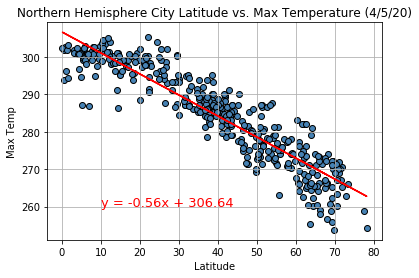

In [18]:
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]
c = "steelblue"
ylabel = "Max Temp"
title = "Northern Hemisphere City Latitude vs. Max Temperature"
line_loc = (10,260)
png_filepath = "../output_data/north_maxtemp.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.65


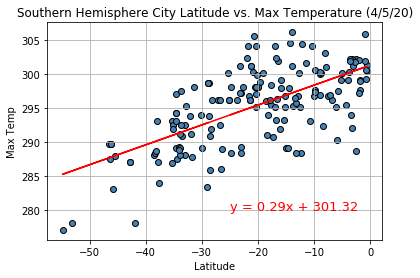

In [19]:
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]
c = "steelblue"
ylabel = "Max Temp"
title = "Southern Hemisphere City Latitude vs. Max Temperature"
line_loc = (-25,280)
png_filepath = "../output_data/south_maxtemp.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)


**Correlation between northern and southern hemispheres and temperature**
<br>
There is a negative correlation between northern hemisphere and temperature as compared to the positive correlation of southern hemisphere and temperature. As the latitude goes closer to the equator with latitude of 0 degrees, the temperature becomes higher.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.27


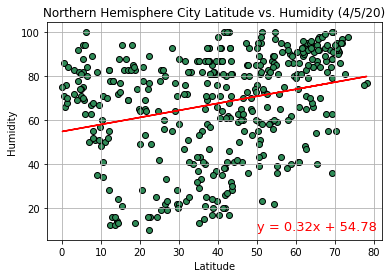

In [20]:
x_values = north_df["Lat"]
y_values = north_df["Humidity"]
c = "seagreen"
ylabel = "Humidity"
title = "Northern Hemisphere City Latitude vs. Humidity"
line_loc = (50,10)
png_filepath = "../output_data/north_humidity.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.14


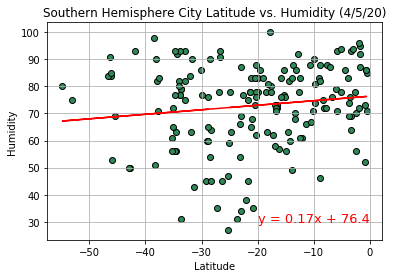

In [21]:
x_values = south_df["Lat"]
y_values = south_df["Humidity"]
c = "seagreen"
ylabel = "Humidity"
title = "Southern Hemisphere City Latitude vs. Humidity"
line_loc = (-20,30)
png_filepath = "../output_data/south_humidity.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)

**Correlation between northern and southern hemispheres and humidity**
<br>
Humidity is not strongly correlated with the differences of latitude. Regardless of whether a country is the northern or southern hemisphere, its latitude does not seem to be a factor to a city's humidity. Thus, both factors are linearly independent variables as proven by its pearson coefficient close to zero. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.21


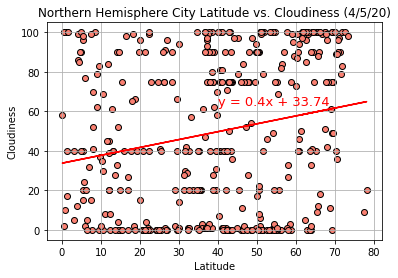

In [22]:
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]
c = "salmon"
ylabel = "Cloudiness"
title = "Northern Hemisphere City Latitude vs. Cloudiness"
line_loc = (40,63)
png_filepath = "../output_data/north_cloudiness.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.06


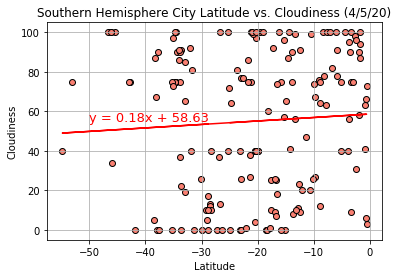

In [23]:
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
c = "salmon"
ylabel = "Cloudiness"
title = "Southern Hemisphere City Latitude vs. Cloudiness"
line_loc = (-50,55)
png_filepath = "../output_data/south_cloudiness.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)

**Correlation between northern and southern hemispheres and cloudiness**
<br>
Cloudiness is not strongly correlated with the differences of latitude. Regardless of whether a country is the northern or southern hemisphere, its latitude does not seem to be a factor to a city's cloudiness. Thus, both factors are linearly independent variables as proven by its pearson coefficient close to zero. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.29


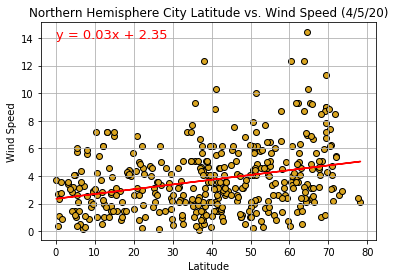

In [24]:
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]
c = "goldenrod"
ylabel = "Wind Speed"
title = "Northern Hemisphere City Latitude vs. Wind Speed"
line_loc = (0,14)
png_filepath = "../output_data/north_windspeed.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.24


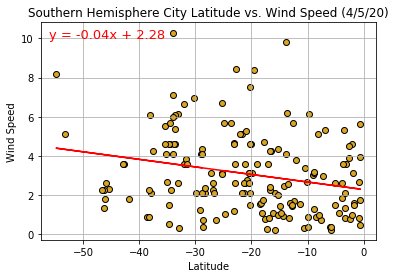

In [25]:
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
c = "goldenrod"
ylabel = "Wind Speed"
title = "Southern Hemisphere City Latitude vs. Wind Speed"
line_loc = (-56,10)
png_filepath = "../output_data/south_windspeed.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)

**Correlation between northern and southern hemispheres and wind speed**
<br>
Wind Speed is not strongly correlated with the differences of latitude. Regardless of whether a country is the northern or southern hemisphere, its latitude does not seem to be a factor to a city's wind speed. Thus, both factors are linearly independent variables as proven by its pearson coefficient close to zero.